### Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

#read saved .csv from MALData notebook
df = pd.read_csv('ani_data.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          424 non-null    object 
 1   type           424 non-null    object 
 2   status         424 non-null    object 
 3   source         424 non-null    object 
 4   rating         424 non-null    object 
 5   score          424 non-null    float64
 6   scored by      424 non-null    int64  
 7   favorites      424 non-null    int64  
 8   episodes       424 non-null    int64  
 9   club count     424 non-null    int64  
 10  forum posts    424 non-null    int64  
 11  forum replies  424 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 39.9+ KB


In [3]:
df['type'].value_counts()

TV                          273
Movie                        95
OVA                          26
Special                      18
ONA                           6
add some                      3
Lantis                        1
Half H.P Studio               1
Sony Music Entertainment      1
Name: type, dtype: int64

In [4]:
df.replace({'type' : { 'add some' : 'Music',
                      'Half H.P Studio' : 'Music',
                      'Sony Music Entertainment' : 'Music',
                      'Lantis': 'Music'}}, inplace = True)

In [5]:
#use to reverse log
np.std(df['episodes'])

61.67116206225224

In [6]:
df['episodes'] = np.log(df['episodes'])

In [7]:
# square each one to reverse them
df['favorites'] = np.sqrt(df['favorites'])
df['club count'] = np.sqrt(df['club count'])
df['forum posts'] = np.sqrt(df['forum posts'])
df['forum replies'] = np.sqrt(df['forum replies'])

In [8]:
df.head()

,title,type,status,source,rating,score,scored by,favorites,episodes,club count,forum posts,forum replies
0,Fullmetal Alchemist: Brotherhood,TV,Finished Airing,Manga,R,9.23,1126315,396.371038,4.158883,24.124676,21.977261,306.692028
1,Steins;Gate,TV,Finished Airing,Visual novel,PG-13,9.13,822051,362.016574,3.178054,18.055470,22.360680,338.068040
2,Gintama°: Gintama Season 4,TV,Finished Airing,Manga,PG-13,9.12,114182,95.047357,3.931826,5.000000,14.142136,162.619187
3,Hunter x Hunter (2011): Hunter x Hunter,TV,Finished Airing,Manga,PG-13,9.12,719220,339.058992,4.997212,15.231546,35.355339,549.954544
4,Ginga Eiyuu Densetsu: Legend of the Galactic H...,OVA,Finished Airing,Novel,R,9.11,44474,111.067547,4.700480,11.916375,18.601075,170.932735


In [9]:
df['source'].value_counts()

Manga           218
Original         79
Light novel      61
Novel            14
Web manga        13
Visual novel     11
4-koma manga     10
Other             7
Unknown           4
Game              4
Music             3
Name: source, dtype: int64

In [10]:
df['status'].value_counts()

Finished Airing     419
Currently Airing      5
Name: status, dtype: int64

In [11]:
df['type'].value_counts()

TV         273
Movie       95
OVA         26
Special     18
Music        6
ONA          6
Name: type, dtype: int64

In [12]:
mask = (df['rating'] == 'None')
df[mask]

,title,type,status,source,rating,score,scored by,favorites,episodes,club count,forum posts,forum replies
328,Hello World,Movie,Finished Airing,Original,None,7.76,20636,23.216374,0.0,1.414214,3.464102,13.527749


In [13]:
df = df[df['rating'] != 'None']

In [14]:
df['rating'].value_counts()

PG-13    254
R        111
R+        24
G         17
PG        15
Rx         2
Name: rating, dtype: int64

In [15]:
df.replace({'rating' : { 'G' : 1,
                      'PG' : 2,
                      'PG-13' : 3,
                      'R': 4,
                       'R+': 5,
                       'Rx': 6}}, inplace = True)

In [16]:
df

,title,type,status,source,rating,score,scored by,favorites,episodes,club count,forum posts,forum replies
0,Fullmetal Alchemist: Brotherhood,TV,Finished Airing,Manga,4,9.23,1126315,396.371038,4.158883,24.124676,21.977261,306.692028
1,Steins;Gate,TV,Finished Airing,Visual novel,3,9.13,822051,362.016574,3.178054,18.055470,22.360680,338.068040
2,Gintama°: Gintama Season 4,TV,Finished Airing,Manga,3,9.12,114182,95.047357,3.931826,5.000000,14.142136,162.619187
3,Hunter x Hunter (2011): Hunter x Hunter,TV,Finished Airing,Manga,3,9.12,719220,339.058992,4.997212,15.231546,35.355339,549.954544
4,Ginga Eiyuu Densetsu: Legend of the Galactic H...,OVA,Finished Airing,Novel,4,9.11,44474,111.067547,4.700480,11.916375,18.601075,170.932735
...,...,...,...,...,...,...,...,...,...,...,...,...
419,Sword Art Online,TV,Finished Airing,Light novel,3,7.35,1294519,246.752913,3.218876,21.954498,23.937418,493.680058
420,Sword Art Online Alternative: Gun Gale Online,TV,Finished Airing,Light novel,3,7.15,164701,34.423829,2.484907,4.472136,10.000000,65.817931
421,Black Clover,TV,Currently Airing,Manga,3,7.25,242488,106.498826,4.867534,5.567764,17.320508,141.467311
422,Blood Lad,TV,Finished Airing,Manga,3,7.39,247344,42.426407,2.302585,7.874008,6.000000,44.922155


In [17]:
df.columns

Index(['title', 'type', 'status', 'source', 'rating', 'score', 'scored by',
       'favorites', 'episodes', 'club count', 'forum posts', 'forum replies'],
      dtype='object')

In [18]:
df.shape

(423, 12)

In [19]:
df.corr()

,rating,score,scored by,favorites,episodes,club count,forum posts,forum replies
rating,1.000000,-0.050976,0.122742,0.130360,0.057144,0.115508,0.126432,0.143271
score,-0.050976,1.000000,0.289267,0.451155,0.153247,0.133334,0.295277,0.282110
scored by,0.122742,0.289267,1.000000,0.884578,0.351290,0.664925,0.676297,0.740290
favorites,0.130360,0.451155,0.884578,1.000000,0.494242,0.751891,0.807390,0.793188
episodes,0.057144,0.153247,0.351290,0.494242,1.000000,0.484727,0.742514,0.536612
club count,0.115508,0.133334,0.664925,0.751891,0.484727,1.000000,0.673980,0.569757
forum posts,0.126432,0.295277,0.676297,0.807390,0.742514,0.673980,1.000000,0.855949
forum replies,0.143271,0.282110,0.740290,0.793188,0.536612,0.569757,0.855949,1.000000


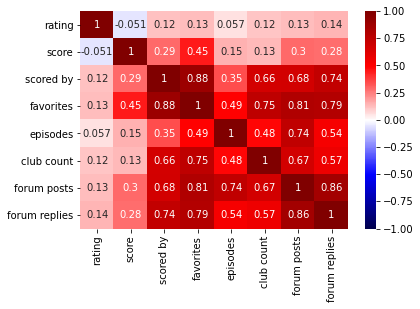

In [20]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

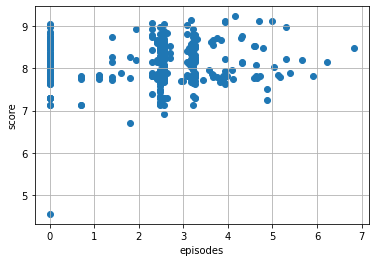

In [22]:
#please run again after outlier is removed
plt.grid()
plt.ylabel('score')
plt.xlabel('episodes')
plt.scatter(df['episodes'], df['score']);

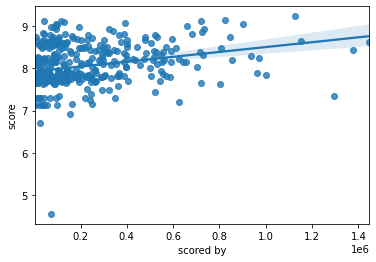

In [23]:
#ditto above comment
sns.regplot(x="scored by", y="score", data=df)

In [24]:
#ditto above comment
mask = (df['forum replies'] == 0)
df[mask]

,title,type,status,source,rating,score,scored by,favorites,episodes,club count,forum posts,forum replies
389,Keroro Gunsou Movie 1: Sergeant Frog Movie,Movie,Finished Airing,Manga,2,7.31,2639,4.358899,0.0,4.123106,0.0,0.0


In [25]:
df.drop(df.loc[df['episodes'] == 0.0].index, inplace=True)

In [26]:
mask = (df['score'] < 5.0)
df[mask]

,title,type,status,source,rating,score,scored by,favorites,episodes,club count,forum posts,forum replies


In [27]:
df.drop(df.loc[df['title']=='Boku no Pico'].index, inplace=True)

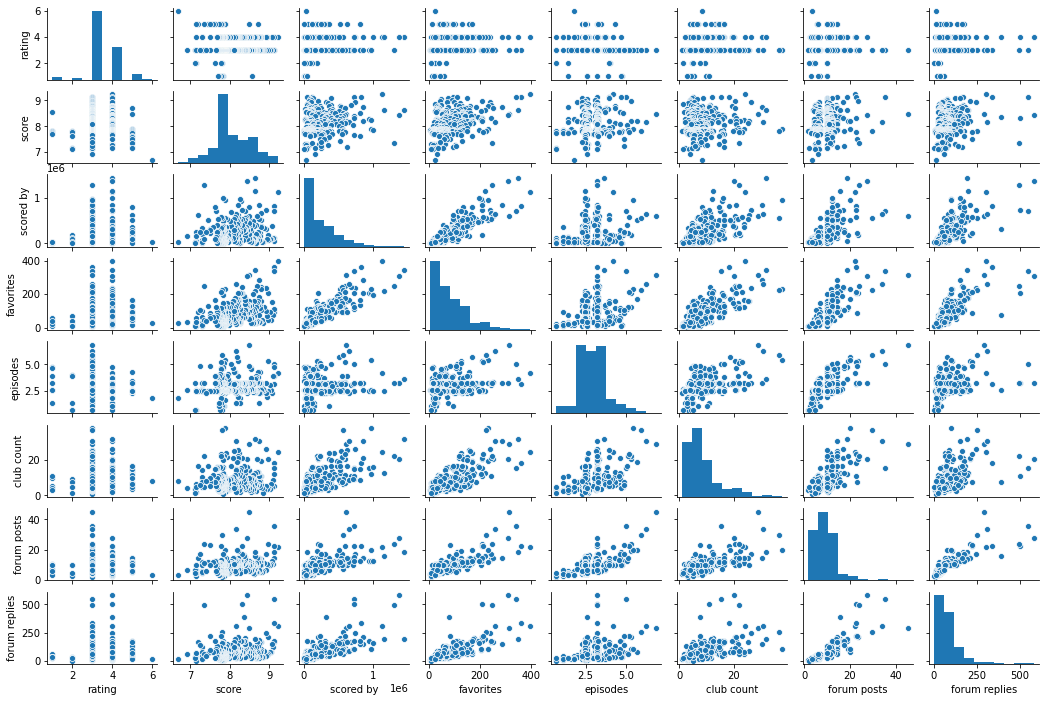

In [28]:
sns.pairplot(df, height=1.2, aspect=1.5);

In [29]:
#copy dataframe into one for modeling for convenience
test_df = df.copy()
test_df.drop(columns = ['source'], inplace=True)

test_dum = pd.get_dummies(test_df, columns=['type', 'status'])
test_dum

,title,rating,score,scored by,favorites,episodes,club count,forum posts,forum replies,type_Movie,type_ONA,type_OVA,type_Special,type_TV,status_Currently Airing,status_Finished Airing
0,Fullmetal Alchemist: Brotherhood,4,9.23,1126315,396.371038,4.158883,24.124676,21.977261,306.692028,0,0,0,0,1,0,1
1,Steins;Gate,3,9.13,822051,362.016574,3.178054,18.055470,22.360680,338.068040,0,0,0,0,1,0,1
2,Gintama°: Gintama Season 4,3,9.12,114182,95.047357,3.931826,5.000000,14.142136,162.619187,0,0,0,0,1,0,1
3,Hunter x Hunter (2011): Hunter x Hunter,3,9.12,719220,339.058992,4.997212,15.231546,35.355339,549.954544,0,0,0,0,1,0,1
4,Ginga Eiyuu Densetsu: Legend of the Galactic H...,4,9.11,44474,111.067547,4.700480,11.916375,18.601075,170.932735,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,Sword Art Online,3,7.35,1294519,246.752913,3.218876,21.954498,23.937418,493.680058,0,0,0,0,1,0,1
420,Sword Art Online Alternative: Gun Gale Online,3,7.15,164701,34.423829,2.484907,4.472136,10.000000,65.817931,0,0,0,0,1,0,1
421,Black Clover,3,7.25,242488,106.498826,4.867534,5.567764,17.320508,141.467311,0,0,0,0,1,1,0
422,Blood Lad,3,7.39,247344,42.426407,2.302585,7.874008,6.000000,44.922155,0,0,0,0,1,0,1


In [30]:
test_dum.columns

Index(['title', 'rating', 'score', 'scored by', 'favorites', 'episodes',
       'club count', 'forum posts', 'forum replies', 'type_Movie', 'type_ONA',
       'type_OVA', 'type_Special', 'type_TV', 'status_Currently Airing',
       'status_Finished Airing'],
      dtype='object')

In [31]:
test_dum.drop(columns = ['status_Currently Airing'], inplace=True)

In [32]:
test_dum.drop(columns = ['type_TV'], inplace=True)

In [33]:
test_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 423
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   299 non-null    object 
 1   rating                  299 non-null    int64  
 2   score                   299 non-null    float64
 3   scored by               299 non-null    int64  
 4   favorites               299 non-null    float64
 5   episodes                299 non-null    float64
 6   club count              299 non-null    float64
 7   forum posts             299 non-null    float64
 8   forum replies           299 non-null    float64
 9   type_Movie              299 non-null    uint8  
 10  type_ONA                299 non-null    uint8  
 11  type_OVA                299 non-null    uint8  
 12  type_Special            299 non-null    uint8  
 13  status_Finished Airing  299 non-null    uint8  
dtypes: float64(6), int64(2), object(1), uint8(

In [34]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

### Train_Test

In [35]:
X, y = test_dum.drop(['title', 'score'],axis=1), test_dum['score']

In [36]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state = 150)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state = 150)

In [38]:
lm = LinearRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.1)
ls_reg = Lasso(alpha=0.001)

In [39]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [40]:
lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}', '\n')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')
lm_reg.fit(X,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test, y_test):.3f}', '\n')

ls_reg.fit(X_train_scaled, y_train)
print(f'Lasso Regression train R^2: {ls_reg.score(X_train_scaled, y_train):.3f}')
print(f'Lasso Regression val R^2: {ls_reg.score(X_val_scaled, y_val):.3f}')
ls_reg.fit(X,y)
print(f'Lasso Regression test R^2: {ls_reg.score(X_test, y_test):.3f}', '\n')

# lm_poly.fit(X_train_poly, y_train)
# print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
# print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression train R^2: 0.453
Linear Regression val R^2: 0.419
Linear Regression test R^2: 0.317 

Ridge Regression train R^2: 0.453
Ridge Regression val R^2: 0.419
Ridge Regression test R^2: 0.319 

Lasso Regression train R^2: 0.452
Lasso Regression val R^2: 0.419
Lasso Regression test R^2: 0.324 



In [41]:
x_columns = list(X.columns[1:])

In [42]:
list(zip(x_columns, lm.coef_))

[('scored by', -0.04642645527576088),
 ('favorites', -1.0978545872210102e-06),
 ('episodes', 0.009787643233905002),
 ('club count', 0.04007236529081131),
 ('forum posts', -0.03311106252517684),
 ('forum replies', -0.008152961108832735),
 ('type_Movie', -0.0007354089828464005),
 ('type_ONA', 1.3877787807814457e-16),
 ('type_OVA', -0.17980826507439682),
 ('type_Special', 0.08383824682246004),
 ('status_Finished Airing', 0.029637939802829576)]

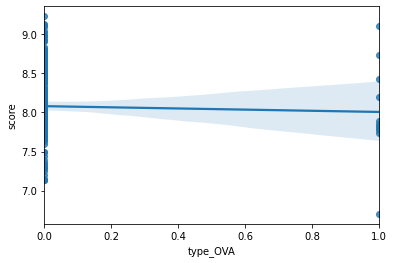

In [43]:
#visual testing of coefficients
sns.regplot(X['type_OVA'], y)

In [44]:
list(zip(x_columns, lm_reg.coef_))

[('scored by', -0.04631947638190598),
 ('favorites', -1.0965480678845836e-06),
 ('episodes', 0.009786811356443314),
 ('club count', 0.040596338483324),
 ('forum posts', -0.03303534204149831),
 ('forum replies', -0.008519136693750293),
 ('type_Movie', -0.0007244922208009507),
 ('type_ONA', 0.0),
 ('type_OVA', -0.17666416812147584),
 ('type_Special', 0.08330153815011719),
 ('status_Finished Airing', 0.029101153463724938)]

In [45]:
list(zip(x_columns, ls_reg.coef_))

[('scored by', -0.04496990422251735),
 ('favorites', -1.1055259296556683e-06),
 ('episodes', 0.009762538263305155),
 ('club count', 0.03426025626629096),
 ('forum posts', -0.03222146654077787),
 ('forum replies', -0.008606877898481394),
 ('type_Movie', -0.0007037420175719153),
 ('type_ONA', 0.0),
 ('type_OVA', -0.14140585981712106),
 ('type_Special', 0.05385484259566583),
 ('status_Finished Airing', 0.0)]

### Cross-Validation

In [46]:
lm = LinearRegression()

cross_val_score(lm, X, y, cv=5, scoring='r2')

array([0.35738568, 0.45197382, 0.43205634, 0.35977604, 0.19750711])

In [47]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X, y, cv=kf, scoring='r2')

array([0.26060756, 0.31412369, 0.51942209, 0.47552719, 0.34242726])

In [48]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(ls_reg, X, y, cv=kf, scoring='r2')))

0.3247704176061408
0.3259582215606434
0.3274439535983988


### Residual Plot & Obeserved vs. Predicted

In [49]:
import scipy.stats as stats

In [50]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

#     plt.subplot(1, 3, 1)
#     plt.scatter(x,y)
#     plt.plot(x, pred, color='blue',linewidth=1)
#     plt.title("Regression fit")
#     plt.xlabel("x")
#     plt.ylabel("y")
    
    plt.subplot(1, 3, 1)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 2)
    res = y #- pred
    plt.scatter(y, pred)
    plt.title("Predicted vs Observed")
    plt.ylabel("prediction")
    plt.xlabel("observed")
    
    #plot for regression line
    #sns.regplot(y,pred)
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [51]:
test_dum.columns

Index(['title', 'rating', 'score', 'scored by', 'favorites', 'episodes',
       'club count', 'forum posts', 'forum replies', 'type_Movie', 'type_ONA',
       'type_OVA', 'type_Special', 'status_Finished Airing'],
      dtype='object')

In [52]:
X, y = test_dum.drop(['title', 'score'],axis=1), test_dum['score']

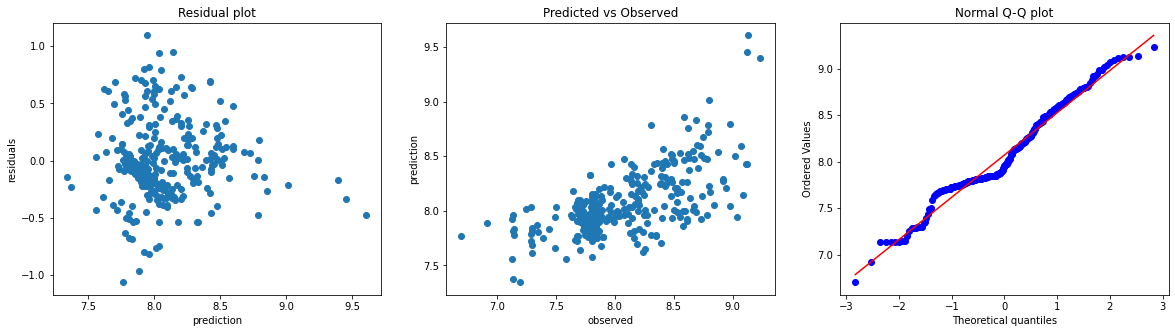

In [53]:
diagnostic_plot(X, y)